In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Feature Engineering
## How to select featues that make a difference

"At the end of the day, some machine learning projects succeed and some fail. What makes the difference? Easily, the most important factor is the features used. If you have many independent features that each correlate well with the class, learning is easy. On the other hand, if the class is a very complex function of the features, you may not be able to learn it. Often, the raw data is not in a form that is amenable to learning, but you can construct features from it that are. This is typically where most of the effort in a machine learning project goes. It is often also one of the most interesting parts, where intuition and creativity are as important as the technical stuff."

-- Pedro Domingos, *A Few Useful Things to Know about Machine Learning*

## What is feature engineering?

- Feature Creation. Create better features by combining existing features (including taking the square, cube, etc. of existing features).
- Feature Selection. Pick features that make a difference and drop the rest.

## Why select features?

- Noise reduction
- The *curse of dimensionality*
 - too many features
 - too few training examples

## The curse of dimensionality

"High dimensional datasets are at the risk of being very sparse: most training instances are likely to be far away from each other. Of course, this also means that a new instance will likely be far away from any training instance, making predictions much less reliable than in lower dimensions, since they will be based on much larger extrapolations. In short, the more dimensions the training set has [i.e., the more attributes], the greater the risk of overfitting it."

> -- Aurélien Géron, *Hands-On Machine Learning with Scikit-Learn & TensorFlow*, p.207

In [2]:
# Range of distances between 2 randomly chosen points in a unit hypercube
import numpy as np
def dist(n_points, n_dims):
    # Generate a random set of n_points to fill the hypercube
    rows1 = np.random.rand(n_points, n_dims)
    
    # Generate another set of random n_points to fill the hypercube
    rows2 = np.random.rand(n_points, n_dims)
    
    distances = [np.linalg.norm(rows1[i] - rows2[i]) for i in range(len(rows1))]
    
    return [np.average(distances), (np.max(distances) - np.min(distances))]

In [3]:
# Try large numbers with caution
dims = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500]
%time d = [dist(10000,x) for x in dims]
d

Wall time: 757 ms


[[1.266863309518095, 1.711678865269392],
 [1.8133852131375559, 2.054807155542397],
 [2.2177188649869937, 1.783254947173007],
 [2.5703269175351227, 1.718325628150016],
 [2.874181700633707, 1.9315692698011802],
 [4.074562503396156, 1.8820731659928964],
 [5.769732768092868, 1.8294964986750841],
 [7.069556075760594, 1.6420198628470635],
 [8.15985978098116, 1.988220441192805],
 [9.127199004204186, 1.8259902017081675]]

In [4]:
x_vals = [d[i][0] for i in range(len(d))]
y_vals = [d[i][1] for i in range(len(d))]

In [5]:
x_vals

[1.266863309518095,
 1.8133852131375559,
 2.2177188649869937,
 2.5703269175351227,
 2.874181700633707,
 4.074562503396156,
 5.769732768092868,
 7.069556075760594,
 8.15985978098116,
 9.127199004204186]

In [6]:
y_vals

[1.711678865269392,
 2.054807155542397,
 1.783254947173007,
 1.718325628150016,
 1.9315692698011802,
 1.8820731659928964,
 1.8294964986750841,
 1.6420198628470635,
 1.988220441192805,
 1.8259902017081675]

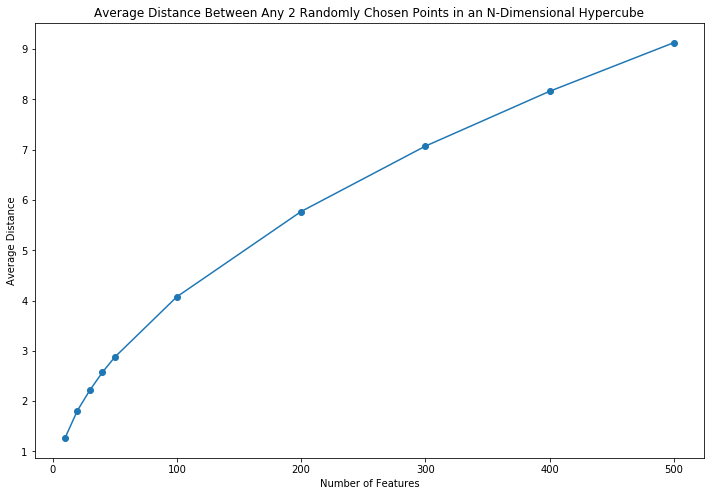

In [7]:
# Average distance of any two randomly chosen points 
## as a function of the number of features
fig = plt.figure(1, figsize=(12, 8))

# Create an axes instance
ax = fig.add_subplot(111)
plt.title('Average Distance Between Any 2 Randomly Chosen Points in an N-Dimensional Hypercube')
plt.xlabel('Number of Features')
plt.ylabel('Average Distance')

# Create the plot
plt.plot(dims, x_vals, marker='o');

## The curse of dimensionality -- another angle

"Generalizing correctly becomes exponentially harder as the dimensionality (number of features) of the examples grows, because a fixed-size training set covers a dwindling fraction of the input space. Even with a moderate dimension of 100 and a huge training set of a trillion examples, the latter covers only a fraction of about $10^{-18}$ of the input space. This is what makes machine learning both necessary and hard."

> -- Pedros Domingos, *A Few Useful Things to Know about Machine Learning*

To read more, go to [How is Learning Even Possible?](https://nbviewer.jupyter.org/github/jsub10/In-Progress/blob/master/How-is-Learning-Possible%3F.ipynb)

## ... and one more...

"Consider an orange: a tasty ball of pulp surrounded by a thin shell of skin. Let's say 90% of the radius of an orange is occupied by pulp, and the remaining 10% by skin. That means 73% of the volume of the orange is pulp ($0.9^{3}$). Now consider a hyperorange: still with 90% of the radius occupied by pulp, but in a hundred dimensions, say. The pulp has shrunk  to only about three thousandths of a percent of the hyperorange's volume ($0.9^{100}$). The hyperorange is all skin, and you'll never be done peeling it!"

> -- Pedros Domingos, *The Master Algorithm* page 187.

![The Curse 1](../Images/The-Curse-of-Dimensionality-1.png)

![The Curse 2](../Images/The-Curse-of-Dimensionality-2.png)

## Ways to Select Features (Reduce Dimensionality)

- Projection (e.g., Principal Component Analysis)
- Manifold Learning
- Sequential Backward Selection
- Random Forest Ranking

## Principal Component Analysis (PCA)

The idea: Find the axis that captures the highest amount of variance. Then find the axis that captures the second highest amount of variance, and so on. These axes are called *principal components*.

There are as many principal components as there are features in the dataset.

<img src='../Images/PCA-2d.jpeg' width='600' />

(Image from Aurélien Géron, *Hands-On Machine Learning with Scikit-Learn & TensorFlow*, p.212)

In a space of $n$ dimensions, PCA will find $n$ principal components. This new set of principal components is another set of axes for the dataset. They are axes chosen to maximize the variance of data when it is projected onto that principal component axis.

Variance is technically the statistical term -- but for simplicity, we can think of it simply as the difference betweeen the maximum and minimum value of the data points projected onto a principal component axis.

Let's see how it's visualized in http://setosa.io/ev/principal-component-analysis/

Caution: It's not always the case that reducing dimensions simplifies a problem.

<img src='../Images/manifold-hypothesis.jpeg' width='600' />

(Image from Aurélien Géron, *Hands-On Machine Learning with Scikit-Learn & TensorFlow*, p.211)

(For a simple introduction to the *manifold hypothesis*, see https://nbviewer.jupyter.org/github/jsub10/In-Progress/blob/master/How-is-Learning-Possible%3F.ipynb)

## Sequential Backward Selection

An algorithm for sequentially removing an attribute that makes the least difference to a model's prediction performance.

<img src='../Images/sequential-backward-selection.png' width='400' />

(You can do Sequential *Forward* Selection too)

## Random Forest Ranking

Random forests take a number of models that are the same (decision tree classifiers) but train each decision tree with a random set of attributes from the training data.

<img src='../Images/random-forests.png' width='400' />

Let's see how PCA and random forests look in Orange...